In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, f_regression
import pandas_profiling as pf
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
#from fastai.imports import *
#from fastai.structured import *
#from fastai.imports import rf_feat_importance
%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
combine = train.append(test)
combine.shape

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(2919, 81)

In [3]:
#pf.ProfileReport(combine)

In [4]:
combine.describe(include='all')

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,198,2919.000000,2919,2837,2837,2918.000000,2918.000000,...,2918,2919.000000,2919,2919.000000,2918.000000,2917,2919.000000,2919.000000,2919.000000,2919.000000
unique,NaN,NaN,NaN,2,NaN,5,4,4,NaN,NaN,...,9,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Grvl,NaN,1Fam,TA,No,NaN,NaN,...,WD,NaN,Pave,NaN,NaN,AllPub,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,120,NaN,2425,2606,1904,NaN,NaN,...,2525,NaN,2907,NaN,NaN,2916,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.423235,49.582248,...,NaN,16.062350,NaN,6.451524,1051.777587,NaN,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.610826,169.205611,...,NaN,56.184365,NaN,1.569379,440.766258,NaN,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,2.000000,0.000000,NaN,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,5.000000,793.000000,NaN,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,NaN,3.000000,NaN,NaN,NaN,368.500000,0.000000,...,NaN,0.000000,NaN,6.000000,989.500000,NaN,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,NaN,3.000000,NaN,NaN,NaN,733.000000,0.000000,...,NaN,0.000000,NaN,7.000000,1302.000000,NaN,168.000000,2001.000000,2004.000000,2009.000000


In [5]:
def correlation(target):
    correlation = combine[combine.isnull()!=True].corr().abs().sort_values(by=target,ascending=False).SalePrice
    print (correlation)

correlation('SalePrice')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

<h1>Missing values</h1>



In [6]:
#duplicaded
combine[combine.duplicated(keep=False)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [7]:
combineNull = ((combine.isnull().sum())/len(combine)).sort_values(ascending=False)
combineNull[combineNull>0]

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Electrical      0.000343
Exterior2nd     0.000343
KitchenQual     0.000343
Exterior1st     0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
dtype: float64

In [8]:
#Replace missing values with random values between them because missing values are close each other 
combine['PoolQC'].fillna('None',inplace=True)

In [9]:
combine['MiscFeature'].fillna(combine['MiscFeature'].mode()[0],inplace=True)

In [10]:
combine['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [11]:
#Replace missing values with random values between them because missing values are close each other 
combine['Alley'].fillna(combine['Alley'].apply(lambda x: np.random.choice(combine.Alley[combine['Alley'].notnull()].unique()) ),inplace=True)

In [12]:
combine['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [13]:
#Replace missing values with random values between them because missing values are close each other 
combine['Fence'].fillna(combine['Fence'].apply(lambda x: np.random.choice(combine.Fence[combine['Fence'].notnull()].unique()) ),inplace=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


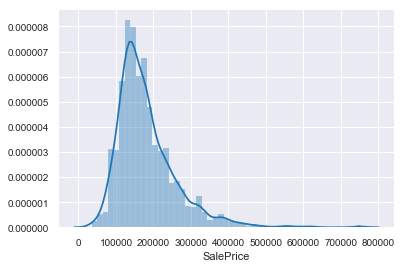

In [14]:
x = combine['SalePrice'][combine['SalePrice'].isnull()!=True]
sns.distplot(x);


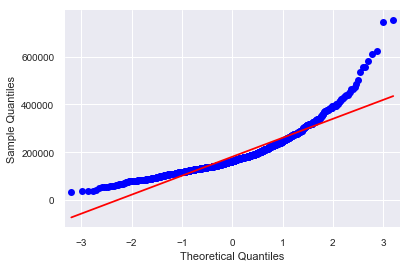

In [15]:
qqplot(x, line='s')
plt.show()

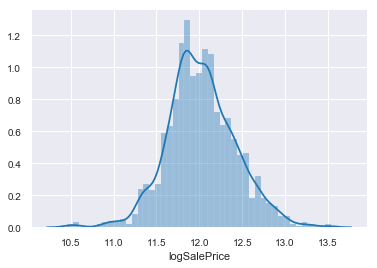

In [16]:
combine['logSalePrice'] = np.log(combine.SalePrice[combine['SalePrice'].isnull()!=True])
sns.distplot(combine['logSalePrice'])

In [17]:
def correlation(target):
    correlation = combine[combine.isnull()!=True].corr().abs().sort_values(by=target,ascending=False).logSalePrice
    print (correlation)
correlation('logSalePrice')

logSalePrice     1.000000
SalePrice        0.948374
OverallQual      0.404713
GrLivArea        0.365294
GarageCars       0.342028
GarageArea       0.335897
TotalBsmtSF      0.322029
FullBath         0.311236
YearBuilt        0.309165
1stFlrSF         0.301143
YearRemodAdd     0.291218
TotRmsAbvGrd     0.285963
GarageYrBlt      0.281780
Fireplaces       0.267276
MasVnrArea       0.209230
LotFrontage      0.191503
BsmtFinSF1       0.190735
WoodDeckSF       0.180367
LotArea          0.175130
OpenPorchSF      0.172191
HalfBath         0.159556
2ndFlrSF         0.159090
BsmtFullBath     0.137672
BsmtUnfSF        0.126910
BedroomAbvGr     0.112501
EnclosedPorch    0.085475
ScreenPorch      0.072835
KitchenAbvGr     0.067197
PoolArea         0.043258
MoSold           0.039792
LowQualFinSF     0.032370
3SsnPorch        0.029373
MSSubClass       0.025091
OverallCond      0.018198
YrSold           0.016180
BsmtHalfBath     0.009049
Id               0.008794
MiscVal          0.006680
BsmtFinSF2  

In [18]:
combine.drop(['SalePrice'],axis = 1, inplace = True)
combine['SalePrice'] = combine['logSalePrice']
combine.drop(['logSalePrice'],axis = 1, inplace = True)

In [19]:
#Replace missing values with random values between them because missing values are close each other 
combine['FireplaceQu'].fillna(combine['FireplaceQu'].apply(lambda x: np.random.choice(combine.FireplaceQu[combine['FireplaceQu'].notnull()].unique()) ),inplace=True)

In [20]:
#fill missing values by the median LotFrontage of all the neighborhoods
combine['LotFrontage'] = combine.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [21]:
combine['GarageFinish'].fillna('None',inplace=True)

In [22]:
combine['GarageCond'].fillna('None',inplace=True)

In [23]:
combine['GarageQual'].fillna('None',inplace=True)

In [24]:
combine['GarageType'].fillna('None',inplace=True)

In [25]:
#combine['GarageYrBlt'][combine['GarageType']=='None'] 157
combine.GarageYrBlt.fillna(combine['GarageType'].apply(lambda x: 0 if x=='None' else np.nan),inplace=True)

In [26]:
combine['GarageYrBlt'].fillna(combine['YearBuilt'], inplace=True)

In [27]:
combine['BsmtCond'].fillna(combine['BsmtCond'].mode()[0],inplace=True)

In [28]:
combine['BsmtExposure'].fillna(combine['BsmtExposure'].mode()[0],inplace=True)

In [29]:
combine['BsmtFinSF1'].fillna(combine['BsmtFinSF1'].median(),inplace=True)

In [30]:
combine['BsmtFinSF2'].fillna(combine['BsmtFinSF2'].median(),inplace=True)

In [31]:
combine['BsmtFinType1'].fillna(combine['BsmtFinType1'].mode()[0],inplace=True)

In [32]:
combine['BsmtFinType2'].fillna(combine['BsmtFinType1'].mode()[0],inplace=True)

In [33]:
combine['BsmtFullBath'].fillna(combine['BsmtFullBath'].mode()[0],inplace=True)

In [34]:
combine['BsmtHalfBath'].fillna(combine['BsmtHalfBath'].mode()[0],inplace=True)

In [35]:
combine['BsmtQual'].fillna(combine['BsmtQual'].mode()[0],inplace=True)

In [36]:
combine['BsmtUnfSF'].fillna(combine['BsmtUnfSF'].mode()[0],inplace=True)

In [37]:
combine['MasVnrType'].fillna(combine['MasVnrType'].mode()[0],inplace=True)

In [38]:
combine['MasVnrArea'].fillna(combine['MasVnrArea'].mode()[0],inplace=True)

In [39]:
combine['MSZoning'].fillna(combine['MSZoning'].mode()[0],inplace=True)

In [40]:
combine['Utilities'].fillna(combine['Utilities'].mode()[0],inplace=True)

In [41]:
combine['Functional'].fillna(combine['Functional'].mode()[0],inplace=True)

In [42]:
combine['Electrical'].fillna(combine['Electrical'].mode()[0],inplace=True)

In [43]:
combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0],inplace=True)

In [44]:
combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0],inplace=True)

In [45]:
combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0],inplace=True)

In [46]:
combine['GarageCars'].fillna(combine['GarageCars'].median(),inplace=True)

In [47]:
#inferred basement area from the first floor total square feet
combine['TotalBsmtSF'].fillna(combine['1stFlrSF'], inplace=True)

In [48]:
combine['GarageArea'].fillna(combine['GarageType'].apply(lambda x: 0 if x=='None' else combine['GarageArea'].mean()),inplace=True)                   

In [49]:
combine['SaleType'].fillna(combine['SaleType'].mode()[0],inplace=True)

In [50]:
combine.isnull().sum().sort_values(ascending=False)

SalePrice        0
HalfBath         0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
EnclosedPorch    0
Electrical       0
Condition2       0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
                ..
SaleType         0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
Utilities        0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
OpenPorchSF      0
Neighborhood     0
MoSold           0
LotConfig        0
HouseStyle       0
Id               0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotFrontage      0
MiscVal     

<h1>Featuring Engineering</h1>

In [51]:
#remodeledYears
#HasGarage
#HasPool
#Rooms
#Baths
#Rooms/baths
#Front Quality
#buildArea
#freeArea = buildArea/lotsize

In [52]:
combine['YearsLastRemodeled'] = 2019 - ((combine['YearRemodAdd'] - combine['YearBuilt']) + combine['YearBuilt'])

In [53]:
combine['HasGarage'] = combine.GarageType.apply(lambda x: 1 if x!='None' else 0)

In [54]:
combine.groupby('PoolQC').count().sort_values(by='PoolQC',ascending=False)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,YearsLastRemodeled,HasGarage
PoolQC,,,,,,,,,,,,,,,,,,,,,
None,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,...,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909
Gd,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Fa,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Ex,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [55]:
combine['HasPool'] = combine['PoolQC'].apply(lambda x: 1 if x!='None' else 0)

In [56]:
combine['HasPool'].unique()

array([0, 1])

In [57]:
combine['builtArea'] = combine['GarageArea'] + combine['TotalBsmtSF'] + combine['1stFlrSF'] + combine['2ndFlrSF']  + combine['WoodDeckSF'] + combine['OpenPorchSF']   

In [58]:
#Proportion of living Area vs Lote Area
combine['FreeArea'] = combine['builtArea'] / combine['LotArea']

In [59]:
#Total Bathroom
combine['TotalBaths'] = combine['BsmtFullBath'] + combine['BsmtHalfBath'] + combine['HalfBath'] + combine['FullBath']

In [60]:
#proportion room vs bathrooms
combine['BathByRoom'] = combine['BedroomAbvGr']/combine['TotalBaths']

In [61]:
combineDummies = pd.get_dummies(combine, drop_first= True) #pandas get dummies convert categorical variables into numerical variables
combineDummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 259 entries, 1stFlrSF to Utilities_NoSeWa
dtypes: float64(16), int64(29), uint8(214)
memory usage: 1.6 MB


In [62]:
combineDummies.corr().abs().sort_values(by='SalePrice',ascending=False).SalePrice

SalePrice               1.000000
builtArea               0.428673
OverallQual             0.404713
GrLivArea               0.365294
TotalBaths              0.346883
GarageCars              0.342045
GarageArea              0.335893
TotalBsmtSF             0.321960
FullBath                0.311236
YearBuilt               0.309165
1stFlrSF                0.301143
YearsLastRemodeled      0.291218
YearRemodAdd            0.291218
TotRmsAbvGrd            0.285963
Foundation_PConc        0.284442
ExterQual_TA            0.281900
KitchenQual_TA          0.271879
Fireplaces              0.267276
BathByRoom              0.264293
BsmtQual_TA             0.255425
ExterQual_Gd            0.239316
GarageType_Attchd       0.216180
GarageFinish_Unf        0.213368
BsmtFinType1_GLQ        0.210198
GarageType_Detchd       0.209125
GarageCond_TA           0.208566
KitchenQual_Gd          0.208488
MSZoning_RM             0.207273
MasVnrArea              0.207094
HeatingQC_TA            0.194511
          

In [63]:
columns = [            
'builtArea',            
'OverallQual',          
'GrLivArea',            
'GarageCars',           
'GarageArea',           
'TotalBsmtSF',          
'TotalBaths',           
'1stFlrSF',                      
'FullBath',             
'TotRmsAbvGrd',         
'YearBuilt',            
'KitchenQual_TA',       
'YearRemodAdd',         
'YearsLastRemodeled',   
'BsmtQual_TA',          
'Foundation_PConc',     
'MasVnrArea',           
'Fireplaces',           
'ExterQual_Gd',         
'BsmtFinType1_GLQ',     
'BathByRoom',           
'GarageFinish_Unf',      
'BsmtFinSF1',           
'MasVnrType_None',               
'GarageType_Detchd']

In [64]:
combineDummies.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,0,0,0,1,1,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,0,0,0,1,1,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,0,0,0,1,1,0
1458,996,1004,0,3,758.0,0.0,0.0,0.0,238.0,0,...,0,0,0,0,0,0,0,1,1,0


In [65]:
salePrice = combineDummies['SalePrice']
salePrice = salePrice[salePrice.notnull()]
salePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1429    12.116695
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11

In [66]:
X_Train = combineDummies[combineDummies['SalePrice'].notnull()]
del X_Train['SalePrice']
X_Test = combineDummies[combineDummies['SalePrice'].isnull()]
del X_Test['SalePrice']

In [67]:
X_Train = X_Train[columns]
Y_Train = salePrice
X_Test = X_Test
x_train, x_val, y_train, y_val = train_test_split( X_Train , Y_Train , test_size=0.20,random_state=0)

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 1173 to 1272
Data columns (total 25 columns):
builtArea             2335 non-null float64
OverallQual           2335 non-null int64
GrLivArea             2335 non-null int64
GarageCars            2335 non-null float64
GarageArea            2335 non-null float64
TotalBsmtSF           2335 non-null float64
TotalBaths            2335 non-null float64
1stFlrSF              2335 non-null int64
FullBath              2335 non-null int64
TotRmsAbvGrd          2335 non-null int64
YearBuilt             2335 non-null int64
KitchenQual_TA        2335 non-null uint8
YearRemodAdd          2335 non-null int64
YearsLastRemodeled    2335 non-null int64
BsmtQual_TA           2335 non-null uint8
Foundation_PConc      2335 non-null uint8
MasVnrArea            2335 non-null float64
Fireplaces            2335 non-null int64
ExterQual_Gd          2335 non-null uint8
BsmtFinType1_GLQ      2335 non-null uint8
BathByRoom            2335 non-null fl

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.27046449 0.03298754 0.09656298 0.00601058 0.08738861 0.06808453
 0.01273852 0.07039023 0.00680499 0.02669301 0.05788262 0.00806194
 0.03477494 0.03304783 0.00384593 0.00436594 0.04297609 0.01443509
 0.00382276 0.00391411 0.03217972 0.00545546 0.06584966 0.00469495
 0.00656747]


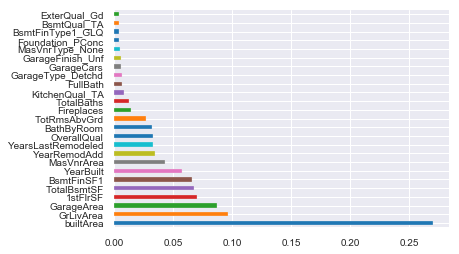

In [70]:
#from sklearn.ensemble import RandomForestRegressor
# load data
# feature extraction
model = RandomForestRegressor()
model.fit(x_train, y_train)
print(model.feature_importances_)
(pd.Series(model.feature_importances_, index=x_train.columns)
   .nlargest(30)
   .plot(kind='barh')) 

In [ ]:
model = Ridge()

In [ ]:
model.fit( x_train , y_train )
print (model.score( x_train , y_train ) , model.score( x_val , y_val ))

In [ ]:
model = LassoLarsCV()

In [ ]:
model.fit(x_train,y_train )
print (model.score( x_train , y_train ) , model.score( x_val , y_val ))

In [ ]:
mR = RandomForestRegressor()

In [ ]:
mR.fit(x_train,y_train )
print (mR.score( x_train , y_train ) , mR.score( x_val , y_val ))

In [ ]:
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
m.fit(x_train,y_train)
print (m.score(x_train,y_train), m.score(x_val,y_val))

In [ ]:
id = X_Test.Id
output = mR.predict(X_Test[columns])
submit = pd.DataFrame({'id': id, 'SalePrice': output})
submit.to_csv('submission.csv',index=False)